In [0]:
from __future__ import print_function
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df_a = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/manoj/notebooks/3_NeuralNetworks/dataset/vowel_a_all_trial_subs.xls',header=None,names=["col_1","col_2","col_3","col_4"])
df_ae = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/manoj/notebooks/3_NeuralNetworks/dataset/vowel_ae_all_trial_subs.xls',header=None,names=["col_1","col_2","col_3","col_4"])
df_e = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/manoj/notebooks/3_NeuralNetworks/dataset/vowel_e_all_trial_subs.xls',header=None,names=["col_1","col_2","col_3","col_4"])
df_i = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/manoj/notebooks/3_NeuralNetworks/dataset/vowel_i_all_trial_subs.xls',header=None,names=["col_1","col_2","col_3","col_4"])
df_u = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/manoj/notebooks/3_NeuralNetworks/dataset/vowel_u_all_trial_subs.xls',header=None,names=["col_1","col_2","col_3","col_4"])

In [0]:
Y_a  = pd.DataFrame(["a" for i in range(len(df_a))],columns=["Class"])
Y_ae = pd.DataFrame(["ae" for i in range(len(df_a))],columns=["Class"])
Y_e  = pd.DataFrame(["e" for i in range(len(df_a))],columns=["Class"])
Y_i  = pd.DataFrame(["i" for i in range(len(df_a))],columns=["Class"])
Y_u  = pd.DataFrame(["u" for i in range(len(df_a))],columns=["Class"])


In [0]:
X = pd.concat([df_a,df_ae,df_e,df_i,df_u])
Y = pd.concat([Y_a,Y_ae,Y_e,Y_i,Y_u])
data = pd.concat([X,Y],axis=1)

In [0]:
data.Class.value_counts()

ae    49152
e     49152
i     49152
a     49152
u     49152
Name: Class, dtype: int64

In [0]:
'''plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Class",vars=np.array(('col_1','col_2','col_3','col_4')),diag_kind="auto",size=4).add_legend();
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.
'''

'plt.close();\nsns.set_style("whitegrid");\nsns.pairplot(data, hue="Class",vars=np.array((\'col_1\',\'col_2\',\'col_3\',\'col_4\')),diag_kind="auto",size=4).add_legend();\nplt.show()\n# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.\n'

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


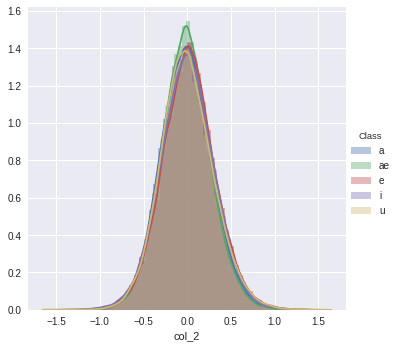

In [0]:
sns.FacetGrid(data, hue="Class", size=5) \
   .map(sns.distplot, "col_2") \
   .add_legend();
plt.show();

In [41]:

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y_final = labelencoder_y.fit_transform(Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_final = sc.fit_transform(X)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size = 0.3,random_state = 0,stratify=Y_final)

In [44]:
# Applying the Logistic regression model.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

# Predicting the model performance on test data
Y_pred = classifier.predict(X_test)
Y_pred

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.2435980902777778

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.3262125651041667

In [0]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.4043918185763889

In [46]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.22615559895833334

In [47]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(activation="relu", alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)



0.2693277994791667

In [0]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

In [48]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_jobs=-1,random_state=0, n_estimators=100)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)




0.2528347439236111

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.22386338975694445

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Finding the model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.2435031467013889

In [40]:
data.head()

,col_1,col_2,col_3,col_4,Class
0,0.3754,0.0076,0.2121,-0.1869,a
1,0.4349,-0.1557,0.1587,-0.2983,a
2,0.4914,-0.2121,0.1587,-0.3548,a
3,0.4654,-0.1908,0.1572,-0.3319,a
4,0.3617,-0.1251,0.1389,-0.2465,a


In [0]:
data.shape